In [309]:
from DiffFlatQuad.robot import PlanerQuadrotor
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [15]:
robot = PlanerQuadrotor(rendering=False)
robot.J = 1

# Open-Loop Control Through Differential Flatness

In [310]:
t = sp.symbols('t')
x1, x3 = [sp.Function(f'x{i}')(t) for i in [1,3]]
x2 = sp.diff(x1, t)
x4 = sp.diff(x3, t)

In [311]:
x5 = sp.atan2(-sp.diff(x1, t,2), sp.diff(x3, t,2)+sp.symbols('g'))
x5

atan2(-Derivative(x1(t), (t, 2)), g + Derivative(x3(t), (t, 2)))

In [312]:
import sympy as sp  
x6 = sp.diff(x5,t)
x6

-(g + Derivative(x3(t), (t, 2)))*Derivative(x1(t), (t, 3))/((g + Derivative(x3(t), (t, 2)))**2 + Derivative(x1(t), (t, 2))**2) + Derivative(x1(t), (t, 2))*Derivative(x3(t), (t, 3))/((g + Derivative(x3(t), (t, 2)))**2 + Derivative(x1(t), (t, 2))**2)

In [313]:
M = sp.symbols('J')*sp.diff(x6,t)
M = M.simplify()
M

J*(2*((g + Derivative(x3(t), (t, 2)))*Derivative(x1(t), (t, 3)) - Derivative(x1(t), (t, 2))*Derivative(x3(t), (t, 3)))*((g + Derivative(x3(t), (t, 2)))*Derivative(x3(t), (t, 3)) + Derivative(x1(t), (t, 2))*Derivative(x1(t), (t, 3))) - ((g + Derivative(x3(t), (t, 2)))*Derivative(x1(t), (t, 4)) - Derivative(x1(t), (t, 2))*Derivative(x3(t), (t, 4)))*((g + Derivative(x3(t), (t, 2)))**2 + Derivative(x1(t), (t, 2))**2))/((g + Derivative(x3(t), (t, 2)))**2 + Derivative(x1(t), (t, 2))**2)**2

In [314]:
F = sp.symbols('m')*(sp.diff(x4,t)+sp.symbols('g'))/sp.cos(x5)
F

m*sqrt((g + Derivative(x3(t), (t, 2)))**2 + Derivative(x1(t), (t, 2))**2)

In [315]:
X = sp.Matrix([x1, x2, x3, x4, x5, x6])
X.simplify()
X

Matrix([
[                                                                                                                                                                                 x1(t)],
[                                                                                                                                                                  Derivative(x1(t), t)],
[                                                                                                                                                                                 x3(t)],
[                                                                                                                                                                  Derivative(x3(t), t)],
[                                                                                                                      atan2(-Derivative(x1(t), (t, 2)), g + Derivative(x3(t), (t, 2)))],
[(-(g + Derivative(x3(t), (t, 2)))*Derivative(x1(t), (t, 3)) 

In [316]:
x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4 = sp.symbols('x DxDt D2xDt2 D3Dt3 D4xDt4 y DyDt D2yDt2 D3yDt3 D4yDt4')
t = sp.symbols('t')
F = F.subs({x1:x, sp.diff(x1, t, 1):dx_dt, sp.diff(x1, t, 2):d2x_dt2, sp.diff(x1, t, 3):d3x_dt3, sp.diff(x1, t, 4):d4x_dt4, 
        x3:y, sp.diff(x3, t, 1):dy_dt, sp.diff(x3, t, 2):d2y_dt2, sp.diff(x3, t, 3):d3y_dt3, sp.diff(x3, t, 4):d4y_dt4, 
        sp.symbols('J'):robot.J, 
        sp.symbols('m'):robot.mass, 
        sp.symbols('g'):np.linalg.norm(robot.gravity)})

M = M.subs({x1:x, sp.diff(x1, t, 1):dx_dt, sp.diff(x1, t, 2):d2x_dt2, sp.diff(x1, t, 3):d3x_dt3, sp.diff(x1, t, 4):d4x_dt4,
                x3:y, sp.diff(x3, t, 1):dy_dt, sp.diff(x3, t, 2):d2y_dt2, sp.diff(x3, t, 3):d3y_dt3, sp.diff(x3, t, 4):d4y_dt4,
                sp.symbols('J'):robot.J,
                sp.symbols('m'):robot.mass,
                sp.symbols('g'):np.linalg.norm(robot.gravity)})

X = X.subs({x1:x, sp.diff(x1, t, 1):dx_dt, sp.diff(x1, t, 2):d2x_dt2, sp.diff(x1, t, 3):d3x_dt3, sp.diff(x1, t, 4):d4x_dt4,
                x3:y, sp.diff(x3, t, 1):dy_dt, sp.diff(x3, t, 2):d2y_dt2, sp.diff(x3, t, 3):d3y_dt3, sp.diff(x3, t, 4):d4y_dt4,
                sp.symbols('J'):robot.J,
                sp.symbols('m'):robot.mass,
                sp.symbols('g'):np.linalg.norm(robot.gravity)})

F_np = sp.lambdify((x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4), F, 'numpy')
M_np = sp.lambdify((x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4), M, 'numpy')
X_np = sp.lambdify((x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4), X, 'numpy')

Now generate an example circular trajectory for the drone to follow

In [317]:
T = 10
omega = 2* 2*np.pi/T


time_num = np.linspace(0, T, int(T/0.01)+1)
x = np.sin(omega*time_num)
dx_dt = np.cos(omega*time_num)*omega
d2x_dt2 = -np.sin(omega*time_num) * omega**2
d3x_dt3 = -np.cos(omega*time_num) * omega**3
d4x_dt4 = np.sin(omega*time_num) * omega**4

y = np.cos(omega*time_num)
dy_dt = -np.sin(omega*time_num) * omega
d2y_dt2 = -np.cos(omega*time_num) * omega**2
d3y_dt3 = np.sin(omega*time_num) * omega**3
d4y_dt4 = np.cos(omega*time_num) * omega**4


In [319]:
import time
# Feed the trajectory the mappings found through the differential flatness analysis 
thrust = F_np(x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4)
torque = M_np(x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4)
states = X_np(x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4).squeeze()
# Intialize the robot with the initial states computed from the differential flatness analysis
robot.x[0]=states[0,0]
robot.x[1]=states[2,0]
robot.v[0]=states[1,0]
robot.v[1]=states[3,0]
robot.theta = states[4,0]
robot.omega = states[5,0]

# Feed the computed thrust and torques to the drone in open loop and record the robot's states
state = []
for i in range(len(time_num)):
    state.append([robot.x[0], robot.v[0], robot.x[1], robot.v[1], robot.theta, robot.omega])
    robot.step(T = torque[i], F = thrust[i])
    # time.sleep(0.01)
state = np.array(state).T

Now compare the robot's state against the desired value

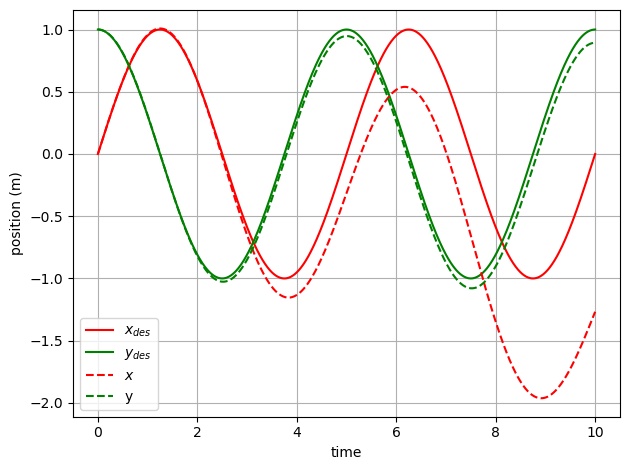

In [46]:
plt.plot(time_num, states[[0],:].T, 'r')
plt.plot(time_num, states[[2],:].T, 'g')

plt.plot(time_num, state[[0],:].T, 'r--')
plt.plot(time_num, state[[2],:].T, 'g--')
plt.legend(['$x_{des}$', '$y_{des}$', '$x$', 'y'])
plt.xlabel('time')
plt.ylabel('position (m)')
plt.grid(True)
plt.tight_layout()
plt.savefig('results/openloop_performance.pdf')

As we can see, eventhough the control inputs provided through the differential flatness formulation initially keeps the drone close to the desired trajectory, after a short amount of time the robot deviates as there are no feedback loops to correct for the numerical inaccuracies (in this case Eular integration error).

# Close Loop Control
In this section, we use the methodology described in [here](https://arxiv.org/abs/1712.02402). First, we design a simple PI body rate controller. This is a common practice in drone industrey to control the body angular rate of the drone through the gyroscope measurement as output and body torque induced by the rotors as input. The system dynamics from torque to body rate is a simple single integrator (neglecting aerodynamics effects).
## Control Without Feed Forward Terms

In [60]:
class PIController():
    def __init__(self, n, Kp, Ki, dt=0.01):
        self.dt = dt
        self.Kp = Kp
        self.Ki = Ki
        self.n = n
        self.e_integrated = np.zeros((n,1))
    def reset(self):
        self.e_integrated = np.zeros((self.n,1))    

    def update(self, x, x_des):
        e = x_des - x
        self.e_integrated += e * self.dt
        return self.Kp*e + self.Ki*self.e_integrated

Now let's test the controller on our simulated robot and control its angular velocity:

In [112]:
import time
rendering = False
T = 10
omega = 2* 2*np.pi/T
time_num = np.linspace(0, T, int(T/0.01)+1)
omega_des = np.sin(omega*time_num)

robot = PlanerQuadrotor(rendering=rendering)
robot.gravity  = np.array([0, 0])
robot.reset()
body_rate_controller = PIController(1, Kp = 10, Ki = 0.1)
body_rate_controller.reset()
# Feed the computed thrust and torques to the drone in open loop and record the robot's states
state = []
for i in range(len(time_num)):
    state.append(robot.omega)
    torque = body_rate_controller.update(robot.omega, omega_des[i])
    robot.step(T = torque.squeeze(), F = 0)
    if rendering:
        time.sleep(0.01)
state = np.array(state).T

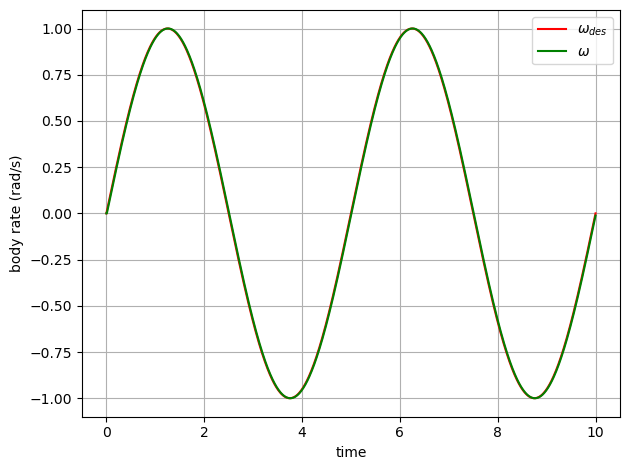

In [113]:
# plot the desired and actual body rates
plt.plot(time_num, omega_des, 'r')
plt.plot(time_num, state.T, 'g')
plt.legend(['$\omega_{des}$', '$\omega$'])
plt.xlabel('time')
plt.ylabel('body rate (rad/s)')
plt.grid(True)
plt.tight_layout()
plt.savefig('results/body_rate_with_PI.pdf')

Now that we have a robot with a good body rate controller, we can move on to the outerloop position controller. We need a function that gets that state of the robot and returns a desired body acceleration:

In [264]:
def computeDesiredAcceleration(x, x_des, v, v_des, Kp = 2, Kv = 0.1):
    return Kp*(x_des - x) + Kv*(v_des - v)+np.array([0, 9.8]).reshape(2,1)

Then, to compute the thrust command, we need to project the desired acceleration in the world frame onto the body z coordinate of the robot:

In [168]:
def getBodyZ(theta):
    body_z_axis = np.array([-np.sin(theta), np.cos(theta)]).reshape(2,1)
    return  body_z_axis

In [189]:
def attitudeController(desired_accel, theta, Kp):
    body_z = getBodyZ(theta)
    body_x = np.array([np.cos(theta), np.sin(theta)]).reshape(2,1)
    a = desired_accel/np.linalg.norm(desired_accel)
    #compute the angle between desired accelaraion and body z axis
    e_R = np.arccos(np.dot(body_z.T, a))
    #compute the direction of the desired rotation
    if body_x.T@desired_accel < 0:
        e_R = -e_R
    #compute the desired angular velocity
    desired_omega = Kp*e_R
    return desired_omega

In [280]:
def thrustController(desired_accel, theta):
    #compute the desired thrust
    body_z = getBodyZ(theta)
    thrust = np.dot(body_z.T, desired_accel)
    return thrust

Now we have everything to control the position of the robot without feed forward term from differential flatness analysis

In [307]:
T = 10
omega = 1* 2*np.pi/T


time_num = np.linspace(0, T, int(T/0.01)+1)
x = np.sin(omega*time_num)
dx_dt = np.cos(omega*time_num)*omega
d2x_dt2 = -np.sin(omega*time_num) * omega**2
d3x_dt3 = -np.cos(omega*time_num) * omega**3
d4x_dt4 = np.sin(omega*time_num) * omega**4

y = np.cos(omega*time_num)
dy_dt = -np.sin(omega*time_num) * omega
d2y_dt2 = -np.cos(omega*time_num) * omega**2
d3y_dt3 = np.sin(omega*time_num) * omega**3
d4y_dt4 = np.cos(omega*time_num) * omega**4

In [207]:
rendering = True
robot = PlanerQuadrotor(rendering=rendering)

In [337]:
import time
# Feed the trajectory the mappings found through the differential flatness analysis 
thrust = F_np(x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4)
torque = M_np(x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4)
states = X_np(x, dx_dt, d2x_dt2, d3x_dt3, d4x_dt4, y, dy_dt, d2y_dt2, d3y_dt3, d4y_dt4).squeeze()

robot.x[0]=states[0,0]
robot.x[1]=states[2,0]
robot.v[0]=states[1,0]
robot.v[1]=states[3,0]
robot.theta = states[4,0]
robot.omega = states[5,0]
robot.gravity = np.array([0, 9.8])
body_rate_controller = PIController(1, Kp = 20, Ki = 0.5)
body_rate_controller.reset()
# Feed the computed thrust and torques to the drone in open loop and record the robot's states
state = []
torque_history = [] 
for i in range(len(time_num)):
    state.append([robot.x[0], robot.v[0], robot.x[1], robot.v[1], robot.theta, robot.omega])
    x_des = np.array([x[i], y[i]]).reshape(2,1)
    v_des = np.array([dx_dt[i], dy_dt[i]]).reshape(2,1)

    # x_des = np.array([0.5, 0.0]).reshape(2,1)
    # v_des = np.array([0, 0]).reshape(2,1)
    x_meas = robot.x.reshape(2,1)
    v_meas = robot.v.reshape(2,1)
    theta = robot.theta

    accel_des = computeDesiredAcceleration(x_meas, x_des, v_meas, v_des, Kp = 2, Kv = 0.5) + np.array([d2x_dt2[i], d2y_dt2[i]]).reshape(2,1)
    omega_des = attitudeController(accel_des, theta, Kp = 20)
    # assert False
    T_controller = body_rate_controller.update(robot.omega, -omega_des+states[5,i])# states[4,i])
    # torque_history.append(torque)
    F_controller = thrustController(accel_des, robot.theta)*robot.mass
    # robot.step(T = torque.squeeze(), F = thrust.squeeze())
    # robot.step(T = torque.squeeze(), F = thrust.squeeze())
    robot.step(T = T_controller.squeeze(), F = F_controller.squeeze())
    if rendering:
        time.sleep(0.01)
state = np.array(state).T
torque_history = np.array(torque_history).T


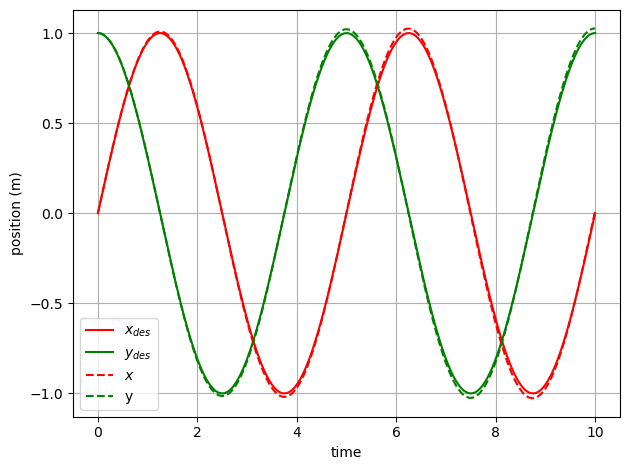

In [338]:
plt.plot(time_num, x.T, 'r')
plt.plot(time_num, y.T, 'g')

plt.plot(time_num, state[[0],:].T, 'r--')
plt.plot(time_num, state[[2],:].T, 'g--')
plt.legend(['$x_{des}$', '$y_{des}$', '$x$', 'y'])
plt.xlabel('time')
plt.ylabel('position (m)')
plt.grid(True)
plt.tight_layout()
plt.savefig('results/pd_with_ff_performance.pdf')

In [150]:
torque_history.squeeze().shape

(1001,)

In [231]:
body_z = getBodyZ(0)
attitudeController(np.array([1,1]).reshape(2,1), 0, 1)

array([[0.78539816]])

In [268]:
computeDesiredAcceleration(np.array([0,0]).reshape(2,1), np.array([0,1]).reshape(2,1), v_meas, v_des, Kp = 1, Kv = 0.0)

array([[ 0. ],
       [10.8]])

## With Feed-Forward

In [ ]:
import time
robot.reset()
robot.x[0]=0
robot.x[1]=1
robot.v[0]=1
robot.v[1]=0
robot.gravity = np.array([0, 9.8])
body_rate_controller = PIController(1, Kp = 10, Ki = 0.5)
body_rate_controller.reset()
# Feed the computed thrust and torques to the drone in open loop and record the robot's states
state = []
torque_history = [] 
for i in range(len(time_num)):
    state.append([robot.x[0], robot.v[0], robot.x[1], robot.v[1], robot.theta, robot.omega])
    x_des = np.array([x[i], y[i]]).reshape(2,1)
    v_des = np.array([dx_dt[i], dy_dt[i]]).reshape(2,1)

    # x_des = np.array([0.5, 0.0]).reshape(2,1)
    # v_des = np.array([0, 0]).reshape(2,1)
    x_meas = robot.x.reshape(2,1)
    v_meas = robot.v.reshape(2,1)
    theta = robot.theta

    accel_des = computeDesiredAcceleration(x_meas, x_des, v_meas, v_des, Kp = 2, Kv = 0.5)
    omega_des = attitudeController(accel_des, theta, Kp = 20)
    # assert False
    torque = body_rate_controller.update(robot.omega, -omega_des)
    torque_history.append(torque)
    thrust = thrustController(accel_des, robot.theta)
    robot.step(T = torque.squeeze(), F = thrust.squeeze())
    if rendering:
        time.sleep(0.01)
state = np.array(state).T
torque_history = np.array(torque_history).T


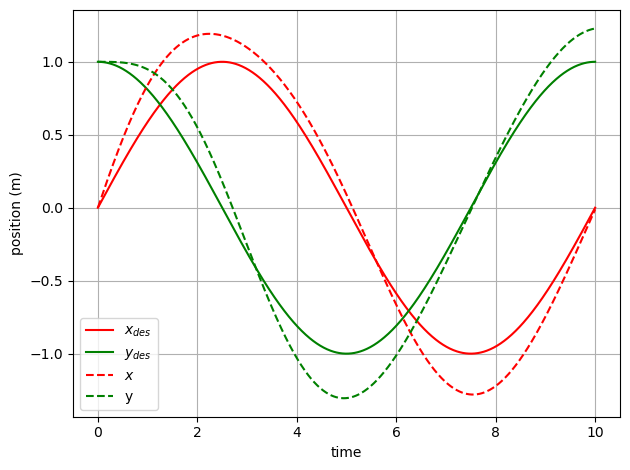

In [ ]:
plt.plot(time_num, x.T, 'r')
plt.plot(time_num, y.T, 'g')

plt.plot(time_num, state[[0],:].T, 'r--')
plt.plot(time_num, state[[2],:].T, 'g--')
plt.legend(['$x_{des}$', '$y_{des}$', '$x$', 'y'])
plt.xlabel('time')
plt.ylabel('position (m)')
plt.grid(True)
plt.tight_layout()
plt.savefig('results/pd_no_ff_performance.pdf')